Завдання 1: Для початку давайте сформулюємо гіпотези для перевірки. Виберіть статистичні гіпотези, які ми зможемо перевірити в цьому експерименті:

Нульова гіпотеза (H0): Різниця між середнім часом доставки в тестовій і контрольній групі є

Альтернативна гіпотеза (H1): Різниця між середнім часом доставки в тестовій і контрольній групі є

Нульова гіпотеза (H0): Зміна алгоритму не впливає на швидкість доставки

Альтернативна гіпотеза (H1): Різниці між середнім часом доставки в тестовій і контрольній немає

Нульова гіпотеза (H0): Різниці між середнім часом доставки в тестовій і контрольній групі немає

Альтернативна гіпотеза (H1): Зміна алгоритму впливає на швидкість доставки

In [14]:
print("Нульова гіпотеза (H0): Різниці між середнім часом доставки в тестовій і контрольній групі немає.")
print("Альтернативна гіпотеза (H1): Зміна алгоритму впливає на швидкість доставки.")

Нульова гіпотеза (H0): Різниці між середнім часом доставки в тестовій і контрольній групі немає.
Альтернативна гіпотеза (H1): Зміна алгоритму впливає на швидкість доставки.


Завдання 2: Завантажте дані та побудуйте графіки розподілів для кожної групи. Які ви можете зробити висновки з цих графіків?

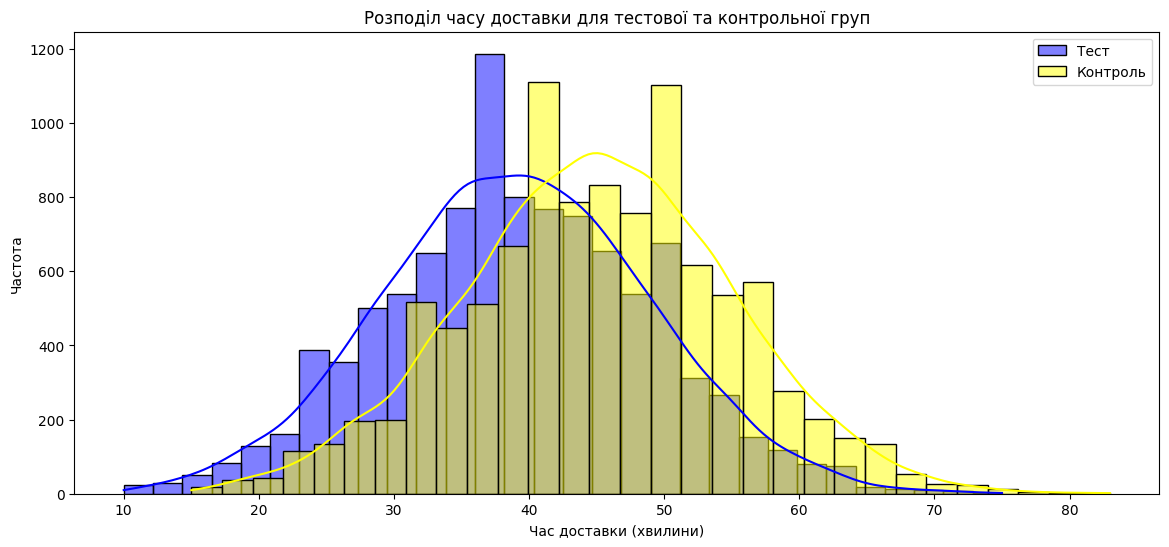

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_url = "https://raw.githubusercontent.com/Aranaur/aranaur.rbind.io/main/datasets/ab_experiment/ab_experiment.csv"
data = pd.read_csv(data_url)

plt.figure(figsize=(14, 6))
sns.histplot(data[data['experiment_group'] == 'test']['delivery_time'], color='blue', label='Тест', kde=True, bins=30)
sns.histplot(data[data['experiment_group'] == 'control']['delivery_time'], color='yellow', label='Контроль', kde=True, bins=30)
plt.title('Розподіл часу доставки для тестової та контрольної груп')
plt.xlabel('Час доставки (хвилини)')
plt.ylabel('Частота')
plt.legend()
plt.show()

Висновок: На основі графіків можна сказати, що розподіли часу доставки у тестовій та контрольній групах мають відмінності. Для експерементальної группи графік виглядає більш нормально, без чітких піків. Також в експеременталній группі зменшився час.

Завдання 3: Порахуйте кількість спостережень у тестовій і контрольній групі. На скільки за модулем відрізняється кількість спостережень у тесті та контролі?

In [16]:
# кількість спостережень у тестовій і контрольній групі

test_count = data[data['experiment_group'] == 'test'].shape[0]
control_count = data[data['experiment_group'] == 'control'].shape[0]
diff = abs(test_count - control_count)

print(f"Кількість спостережень у тестовій групі: {test_count}")
print(f"Кількість спостережень у контрольній групі: {control_count}")
print(f"Відмінність у кількості спостережень за модулем: {diff}")

Кількість спостережень у тестовій групі: 10104
Кількість спостережень у контрольній групі: 10092
Відмінність у кількості спостережень за модулем: 12


Висновок: Невелика різниця не є критичною, відмінність у 12 спостережень при загальній кількості понад 10000 є дуже невеликою і не матиме значущого впливу на результати порівняння. Таким чином, тестові та контрольні групи можна вважати майже ідентичними за кількістю.

Завдання 4: Тепер давайте вивчимо наші розподіли. Перевіримо виконання умов на нормальність і порахуємо стандартне відхилення в тесті та в контролі.

In [17]:
from scipy.stats import shapiro

# семплювання 1000 спостережень для перевірки на нормальність
test_sample = data[data['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
control_sample = data[data['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

# перевірка на нормальність
shapiro_test = shapiro(test_sample)
shapiro_control = shapiro(control_sample)

print(f"Тест Шапіро-Вілка для тестової групи: p-value = {shapiro_test.pvalue}")
print(f"Тест Шапіро-Вілка для контрольної групи: p-value = {shapiro_control.pvalue}")

# обчислення стандартного відхилення
std_test = data[data['experiment_group'] == 'test']['delivery_time'].std()
std_control = data[data['experiment_group'] == 'control']['delivery_time'].std()

print(f"Стандартне відхилення для тестової групи: {std_test:.2f}")
print(f"Стандартне відхилення для контрольної групи: {std_control:.2f}")

Тест Шапіро-Вілка для тестової групи: p-value = 0.14001426100730896
Тест Шапіро-Вілка для контрольної групи: p-value = 0.12408281117677689
Стандартне відхилення для тестової групи: 9.88
Стандартне відхилення для контрольної групи: 9.99


Висновок: Розподіли часу доставки в обох групах відповідають нормальному розподілу, і стандартні відхилення схожі. Це дозволяє використовувати t-критерій Стьюдента для подальшого порівняння середніх значень часу доставки між групами, оскільки основні передумови для цього тесту виконуються.

Завдання 5: Порівняйте середні часи доставки в тестовій і контрольній групі. Використайте критерій Стьюдента для незалежних вибірок.

In [18]:
from scipy.stats import ttest_ind

# порівняння середніх значень часу доставки в тестовій і контрольній групі

test_times = data[data['experiment_group'] == 'test']['delivery_time']
control_times = data[data['experiment_group'] == 'control']['delivery_time']

t_stat, p_value = ttest_ind(test_times, control_times, equal_var=False)

print(f"t-статистика: {t_stat:.2f}, p-значення: {p_value:.5f}")

t-статистика: -43.04, p-значення: 0.00000


Завдання 6: На скільки відсотків змінився середній час доставки в тестовій групі порівняно з контрольною (округліть до сотих)?

Знак зміни необхідно врахувати!

In [19]:
mean_test = test_times.mean()
mean_control = control_times.mean()

# обчислення відсоткової зміни
percent_change = ((mean_test - mean_control) / mean_control) * 100

print(f"Відсоткова зміна середнього часу доставки в тестовій групі порівняно з контрольною: {percent_change:.2f}%")

Відсоткова зміна середнього часу доставки в тестовій групі порівняно з контрольною: -13.35%


13% - це вагомий результат який свідчить про те що новий алгоритм потрібно вводити

In [20]:
if p_value < 0.05:
    print("Висновок: Є статистично значущі відмінності між тестовою та контрольною групами. Рекомендується впровадити новий алгоритм для всіх кур'єрів.")
else:
    print("Висновок: Статистично значущих відмінностей не виявлено. Немає достатніх підстав для впровадження нового алгоритму для всіх кур'єрів.")

Висновок: Є статистично значущі відмінності між тестовою та контрольною групами. Рекомендується впровадити новий алгоритм для всіх кур'єрів.
